# Wrangle WeRateDogs Twitter Data

## Gather

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

In [327]:
import pandas as pd
import requests
import os
import time
import tweepy
import json

import matplotlib.pyplot as plt
% matplotlib inline

#### Gather WeRateDogs Twitter archive file on hand

The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

In [328]:
# WeRateDogs Twitter archive file on hand
# Read CSV (comma-separated) file into DataFrame
df_tweets = pd.read_csv('twitter-archive-enhanced.csv.csv')

In [16]:
df_tweets.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Programmatically download tweet image predictions

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [17]:
# tweet image predictions
# hosted on Udacity servers, to be downloaded programmatically 
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [18]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
response

<Response [200]>

In [137]:
df_images = pd.read_table('image-predictions/image-predictions.tsv',
                          sep='\t')

#### Gather retweet and favorite counts with Tweepy

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [20]:
consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_secret = 'xxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

https://iamstarkov.com/get-twitter-tokens/ 

In [21]:
# List of dictionaries to build and convert to a DataFrame later
# Fetch tweets from the twitter API using the following loop:
api_list = []
# Tweets that can't be found are saved in the list below:
api_errors = []
# want to measure the elapsed wall-clock time between two points
start = time.time()
for tweet_id in df_tweets['tweet_id'].astype(list):
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)._json  
        api_list.append(tweet)  
    except Exception as e:
        print('ERROR tweet id: {}'.format(tweet_id))
        api_errors.append(tweet_id)
end = time.time()
print ('Complete after {} seconds'.format(end - start))  

ERROR tweet id: 888202515573088257
ERROR tweet id: 873697596434513921
ERROR tweet id: 869988702071779329
ERROR tweet id: 866816280283807744
ERROR tweet id: 861769973181624320
ERROR tweet id: 845459076796616705
ERROR tweet id: 842892208864923648
ERROR tweet id: 837012587749474308
ERROR tweet id: 827228250799742977
ERROR tweet id: 815990720817401858
ERROR tweet id: 802247111496568832
ERROR tweet id: 775096608509886464
ERROR tweet id: 771004394259247104
ERROR tweet id: 770743923962707968


Rate limit reached. Sleeping for: 616


ERROR tweet id: 754011816964026368


Rate limit reached. Sleeping for: 632


ERROR tweet id: 670403879788544000
Complete after 2049.0151138305664 seconds


...and we write this list into a txt file:

In [22]:
with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
    json.dump(api_list, outfile, ensure_ascii=False, sort_keys=True, indent=4)
    

In [28]:
# Now we are going to create a DataFrame
# df_api = pd.DataFrame(api_list)
# df_api.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [316]:
df_api = pd.read_json('tweet_json.txt')
df_api.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [317]:
df_api.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540}, 'medium': {'h': 528, 'resize': 'fit', 'w': 540}, 'small': {'h': 528, 'resize': 'fit', 'w': 540}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/MgUWQ76dJU'}], 'symbols': [], 'urls': [], 'user_mentions': []}","{'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540}, 'medium': {'h': 528, 'resize': 'fit', 'w': 540}, 'small': {'h': 528, 'resize': 'fit', 'w': 540}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/MgUWQ76dJU'}]}",38449,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,NaN,NaN,NaN,NaN,8459,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'contributors_enabled': False, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'default_profile': False, 'default_profile_image': False, 'description': 'Your Only Source For Professional Dog Ratings IG, FB, Snapchat â‡¨ WeRateDogs â €â € â € â €â €â € â € Business: dogratingtwitter@gmail.com', 'entities': {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'weratedogs.com', 'expanded_url': 'http://weratedogs.com', 'indices': [0, 23], 'url': 'https://t.co/N7sNNHAEXS'}]}}, 'favourites_count': 137669, 'follow_request_sent': False, 'followers_count': 7207661, 'following': False, 'friends_count': 10, 'geo_enabled': True, 'has_extended_profile': False, 'id': 4196983835, 'id_str': '4196983835', 'is_translation_enabled': False, 'is_translator': False, 'lang': 'en', 'listed_count': 5037, 'location': 'â‡© merch â‡© DM YOUR DOGS', 'name': 'WeRateDogsâ„¢', 'notifications': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1525830435', 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'protected': False, 'screen_name': 'dog_rates', 'statuses_count': 8752, 'time_zone': None, 'translator_type': 'none', 'url': 'https://t.co/N7sNNHAEXS', 'utc_offset': None, 'verified': True}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 

In [318]:
df_twitter = df_api[['id', 'retweet_count', 'favorite_count']]
df_twitter.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8459,38449
1,892177421306343426,6230,32948


api.get_status(tweet_id, tweet_mode='extended')

Setting the wait_on_rate_limit and wait_on_rate_limit_notify parameters to True in the tweepy.api class is useful as well.

https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python 

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api 

https://github.com/auroredupontd/dand-p8-wrangle-analyze-data/blob/master/wrangle_act.ipynb

## Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

#### 1. Assess Enhanced Twitter Archive

In [329]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [330]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [331]:
df_tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.…,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,None,None,None,None
1191,717841801130979328,NaN,NaN,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Barclay. His father was a banana. 11/10 appeeling af https://t.co/ucOEfr2rjV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717841801130979328/photo/1,11,10,Barclay,None,None,None,None
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Fillup. Spaghetti is his main weakness. Also pissed because he's rewarded with cat treats 11/10 it'll be ok pup https://t.co/TEHu55ZQKD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878809702401/photo/1,11,10,Fillup,None,None,None,None
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1",12,10,Boomer,None,None,pupper,None
1848,675798442703122432,NaN,NaN,2015-12-12 22:04:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bernie. He just touched a boob for the first time. 10/10 https://t.co/whQKMygnK6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442703122432/photo/1,10,10,Bernie,None,None,None,None


In [332]:
df_tweets.name.value_counts()

None          745
a             55 
Charlie       12 
Oliver        11 
Lucy          11 
Cooper        11 
Tucker        10 
Lola          10 
Penny         10 
Bo            9  
Winston       9  
Sadie         8  
the           8  
Buddy         7  
an            7  
Daisy         7  
Bailey        7  
Toby          7  
Dave          6  
Leo           6  
Koda          6  
Rusty         6  
Jax           6  
Milo          6  
Jack          6  
Stanley       6  
Bella         6  
Scout         6  
Oscar         6  
Phil          5  
             ..  
Clarkus       1  
Spark         1  
Blanket       1  
Winifred      1  
Dook          1  
Clybe         1  
Jeb           1  
Christoper    1  
Ozzie         1  
Vinnie        1  
Joshwa        1  
Champ         1  
Pinot         1  
Glenn         1  
this          1  
Einstein      1  
Pumpkin       1  
Tom           1  
Lili          1  
Lucky         1  
Evy           1  
Bert          1  
Venti         1  
Ben           1  
Pupcasso  

In [333]:
df_tweets.duplicated(subset='text').sum()

0

In [334]:
df_tweets[df_tweets.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter

In [335]:
df_tweets[df_tweets.name.str.contains('Canela')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None


In [336]:
df_tweets[df_tweets.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [337]:
df_tweets_fakenames = df_tweets[df_tweets.name.str.islower() == True]

In [338]:
df_tweets_fakenames.name.value_counts()

a               55
the             8 
an              7 
very            5 
quite           4 
one             4 
just            4 
not             2 
actually        2 
mad             2 
getting         2 
my              1 
old             1 
incredibly      1 
this            1 
light           1 
unacceptable    1 
infuriating     1 
officially      1 
by              1 
life            1 
his             1 
space           1 
such            1 
all             1 
Name: name, dtype: int64

In [339]:
df_tweets[df_tweets.name.str.contains('tanner')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [340]:
df_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [341]:
pd.set_option('display.max_colwidth', -1)
df_tweets[df_tweets.rating_numerator < 6]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,Non

In [342]:
sum(df_tweets.duplicated())

0

#### 2. Assess Image Predictions File

In [343]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [344]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [345]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1008,709207347839836162,https://pbs.twimg.com/media/CdecUSzUIAAHCvg.jpg,1,Chihuahua,0.948323,True,Italian Greyhound,0.017730,True,Quilt,0.016688,False
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh Springer Spaniel,0.728153,True,Basset,0.103842,True,Brittany Spaniel,0.062414,True
834,694001791655137281,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,1,Pembroke,0.769999,True,Cardigan,0.229228,True,Chihuahua,0.000247,True
937,703611486317502464,https://pbs.twimg.com/media/CcO66OjXEAASXmH.jpg,1,Pembroke,0.756441,True,Basenji,0.126621,True,Cardigan,0.080117,True
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,Toy Terrier,0.112943,True,Kelpie,0.053365,True


In [346]:
df_images.p1.value_counts()

Golden Retriever             150
Labrador Retriever           100
Pembroke                     89 
Chihuahua                    83 
Pug                          57 
Chow                         44 
Samoyed                      43 
Toy Poodle                   39 
Pomeranian                   38 
Malamute                     30 
Cocker Spaniel               30 
French Bulldog               26 
Miniature Pinscher           23 
Chesapeake Bay Retriever     23 
Seat Belt                    22 
German Shepherd              20 
Siberian Husky               20 
Staffordshire Bullterrier    20 
Web Site                     19 
Cardigan                     19 
Maltese Dog                  18 
Shetland Sheepdog            18 
Eskimo Dog                   18 
Teddy                        18 
Beagle                       18 
Rottweiler                   17 
Lakeland Terrier             17 
Shih-Tzu                     17 
Italian Greyhound            16 
Kuvasz                       16 
          

In [347]:
sum(df_images.duplicated(subset='tweet_id'))

0

#### 3. Assess Additional Data via the Twitter API

In [348]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [349]:
df_twitter.describe()

,id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422638e+17,2978.238462,8038.561538
std,6.837075e+16,4988.764449,12370.845502
min,6.660209e+17,0.000000,0.000000
25%,6.783704e+17,598.000000,1390.000000
50%,7.186224e+17,1395.500000,3506.500000
75%,7.986989e+17,3475.500000,9875.000000
max,8.924206e+17,84531.000000,164238.000000


In [350]:
df_twitter.sample(5)

,id,retweet_count,favorite_count
89,874680097055178752,4648,27653
108,871102520638267392,5542,20894
1658,682303737705140231,1083,3267
1935,673688752737402881,521,1297
2316,666345417576210432,135,294


In [402]:
sum(df_twitter.duplicated(subset='tweet_id'))

0

## Quality Issues

df_tweets
1. Incorrect dog names such as "None", "a", "the", "an"
2. Retweets duplicate entries for original tweet
3. Source includes complete url, only need source name
4. 835152434251116546 Rating is for plagiarism account. When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag	
5. 722974582966214656 Rating is 13/10, not 4/10. Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
6. 667550882905632768 Rating is -5 for plagiarism account. RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb

df_images
1. p1 p2 p3 should be Proper Nouns

df_twitter
1. Retweets duplicate entries for original tweet
2. rename id to tweet_id to match 


## Tidiness Issues

1. Stage name should be one column because each variable forms a column
2. Merge all dataframes into one using tweet_id
3. Additional columns which add little value may hide some duplicates
4. Remove duplicates
5. Column names unclear

## Clean


In [352]:
df_tweets_clean = df_tweets
df_images_clean = df_images
df_twitter_clean = df_twitter

#### Define
- Select all records in the names such as "a", "the", "an", etc. and replace the text with "none"

#### Code

In [353]:
fakenames = list(df_tweets_fakenames.name.unique())
fakenames

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [354]:
for nonname in fakenames:
    df_tweets_clean.loc[df_tweets_clean.name == nonname, 'name'] = None

In [355]:
df_tweets_clean.loc[df_tweets_clean.name == 'None', 'name'] = None

#### Test

In [356]:
df_tweets_clean.name.value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo           9 
Winston      9 
Sadie        8 
Bailey       7 
Buddy        7 
Toby         7 
Daisy        7 
Rusty        6 
Dave         6 
Jack         6 
Milo         6 
Bella        6 
Oscar        6 
Koda         6 
Leo          6 
Scout        6 
Jax          6 
Stanley      6 
Chester      5 
Larry        5 
Bentley      5 
Phil         5 
George       5 
            .. 
BeBe         1 
Naphaniel    1 
Eazy         1 
Kaiya        1 
Jimbo        1 
Huxley       1 
Rupert       1 
Kona         1 
Siba         1 
Ralphus      1 
Dot          1 
Lizzie       1 
Holly        1 
Freddery     1 
Jockson      1 
Harnold      1 
Chaz         1 
Mosby        1 
Dutch        1 
Herb         1 
Glacier      1 
Burt         1 
Iroh         1 
Puff         1 
Laika        1 
Buddah       1 
Mutt         1 
Remy         1 
Shadoe       1 
Rudy         1 
Name: name, Length: 931,

#### Define
- Select all records which are retweets and delete rows

#### Code

In [357]:
df_tweets_clean_RT = df_tweets_clean[df_tweets_clean.retweeted_status_id.notnull()==True]
df_tweets_clean_RT.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
742,780476555013349377,NaN,NaN,2016-09-26 18:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Patreon: Well. @dog_rates is on Patreon. \n\n12/10. \n\nhttps://t.co/rnKvzt6RJs https://t.co/v4e2ywe8iO,7.804657e+17,1.228326e+09,2016-09-26 17:55:00 +0000,"https://www.patreon.com/WeRateDogs,https://twitter.com/Patreon/status/780465709297995776/photo/1,https://www.patreon.com/WeRateDogs,https://twitter.com/Patreon/status/780465709297995776/photo/1",12,10,None,None,None,None,None
194,855245323840757760,NaN,NaN,2017-04-21 02:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug…,8.421635e+17,4.196984e+09,2017-03-16 00:00:07 +0000,"https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1",12,10,George,None,None,None,None
488,813944609378369540,NaN,NaN,2016-12-28 03:08:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce https://t.co/aI7umZHIq7,7.902771e+17,4.196984e+09,2016-10-23 19:42:02 +0000,"https://twitter.com/dog_rates/status/790277117346975746/photo/1,https://twitter.com/dog_rates/status/790277117346975746/photo/1",11,10,Bruce,None,None,None,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I'm not sure what's happening here, but it's pretty spectacular. 12/10 for both https://t.co/JKXh0NbBNL",7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,"https://twitter.com/dog_rates/status/701214700881756160/photo/1,https://twitter.com/dog_rates/status/701214700881756160/photo/1",12,10,None,None,None,None,None


In [358]:
df_tweets_clean = df_tweets_clean[df_tweets_clean.retweeted_status_id.notnull()==False]

#### Test

In [359]:
df_tweets_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### Define
- Replace href tags with name of source

#### Code

In [360]:
df_tweets_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [361]:
df_tweets_clean.loc[df_tweets_clean.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = 'Twitter for iPhone'
df_tweets_clean.loc[df_tweets_clean.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'source'] = 'Vine'
df_tweets_clean.loc[df_tweets_clean.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = 'Twitter Web Client'
df_tweets_clean.loc[df_tweets_clean.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source'] = 'TweetDeck'

E:\Programs\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test

In [362]:
df_tweets_clean.source.value_counts()

Twitter for iPhone    2042
Vine                  91  
Twitter Web Client    31  
TweetDeck             11  
Name: source, dtype: int64

#### Define
- Remove tweet_id 835152434251116546 because Rating is for plagiarism account. 
- When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag	
#### Code

In [363]:
df_tweets_clean = df_tweets_clean[df_tweets_clean.tweet_id != 835152434251116546]

#### Test

In [364]:
df_tweets_clean[df_tweets_clean.tweet_id == 835152434251116546]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
- Change tweet_id 722974582966214656 Rating to 13/10 not 4/10. 
- Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
#### Code

In [365]:
print(df_tweets_clean.loc[[1165]])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1165  722974582966214656 NaN                    NaN                    

                      timestamp              source  \
1165  2016-04-21 02:25:47 +0000  Twitter for iPhone   

                                                                  text  \
1165  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   

      retweeted_status_id  retweeted_status_user_id  \
1165 NaN                  NaN                         

     retweeted_status_timestamp  \
1165  NaN                         

                                                        expanded_urls  \
1165  https://twitter.com/dog_rates/status/722974582966214656/photo/1   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  
1165  4                 20                  None  None  None    None   None  


In [366]:
df_tweets_clean.loc[df_tweets_clean['tweet_id'] == 722974582966214656, 'rating_numerator'] = 13
df_tweets_clean.loc[df_tweets_clean['tweet_id'] == 722974582966214656, 'rating_denominator'] = 10

#### Test

In [367]:
print(df_tweets_clean.loc[[1165]])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1165  722974582966214656 NaN                    NaN                    

                      timestamp              source  \
1165  2016-04-21 02:25:47 +0000  Twitter for iPhone   

                                                                  text  \
1165  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   

      retweeted_status_id  retweeted_status_user_id  \
1165 NaN                  NaN                         

     retweeted_status_timestamp  \
1165  NaN                         

                                                        expanded_urls  \
1165  https://twitter.com/dog_rates/status/722974582966214656/photo/1   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  
1165  13                10                  None  None  None    None   None  


#### Define
- Convert all p1 p2 p3 should be Proper Nouns
- Convert first character of each word to uppercase and remaining to lowercase.
- Convert underscores to spaces
#### Code

In [368]:
df_images_clean['p1'] = df_images_clean['p1'].str.title()
df_images_clean['p2'] = df_images_clean['p2'].str.title()
df_images_clean['p3'] = df_images_clean['p3'].str.title()
df_images_clean['p1'] = df_images_clean['p1'].str.replace('_', ' ')
df_images_clean['p2'] = df_images_clean['p2'].str.replace('_', ' ')
df_images_clean['p3'] = df_images_clean['p3'].str.replace('_', ' ')

#### Test

In [369]:
df_images_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,Seat Belt,0.997659,False,Lakeland Terrier,0.001731,True,Airedale,0.000204,True
1552,793150605191548928,https://pbs.twimg.com/media/CwHWOZ7W8AAHv8S.jpg,1,Italian Greyhound,0.193869,True,Bluetick,0.160380,True,Standard Poodle,0.125982,True
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,Hippopotamus,0.505675,False,Hog,0.370726,False,Warthog,0.018827,False
1140,729823566028484608,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1,Kelpie,0.218408,True,Arabian Camel,0.114368,False,Coyote,0.096409,False
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,Beagle,0.848735,True,Ibizan Hound,0.044603,True,Italian Greyhound,0.018611,True


#### Define
- rename id to tweet_id to match 

#### Code

In [370]:
df_twitter_clean.sample(1)

,id,retweet_count,favorite_count
1504,690735892932222976,1386,4012


In [371]:
df_twitter_clean.columns = ['tweet_id', 'retweet_count', 'favorite_count']

#### test

In [372]:
df_twitter_clean.sample(5)


,tweet_id,retweet_count,favorite_count
512,809808892968534016,5460,0
1360,701889187134500865,1491,3773
1715,679854723806179328,1340,3035
1307,706291001778950144,505,1799
64,879492040517615616,3172,23231


#### Define
- Merge all dataframes into one using tweet_id

#### Code

In [373]:
df_clean = pd.merge(df_tweets_clean, df_images_clean, on='tweet_id', how='inner')

In [374]:
df_clean = pd.merge(df_clean, df_twitter_clean, on='tweet_id', how='inner')

#### Test

In [375]:
df_clean[df_clean.duplicated(subset='tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [376]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
476,791406955684368384,NaN,NaN,2016-10-26 22:31:36 +0000,Twitter for iPhone,Say hello to Levi. He's a Madagascan Butterbop. One of the more docile Butterbops I've seen. 12/10 would give all the pets https://t.co/Zcw9Sccctc,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1",...,0.972629,True,Cardigan,0.027026,True,Basenji,0.000153,True,4590,14221
1898,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320556335104/photo/1,...,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,540,885
343,817171292965273600,NaN,NaN,2017-01-06 00:49:53 +0000,Twitter for iPhone,This is Tebow. He kindly requests that you put down the coffee and play with him. 13/10 such a good boy https://t.co/56uBP28eqw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817171292965273600/photo/1,...,0.295483,True,Irish Setter,0.144431,True,Chesapeake Bay Retriever,0.077879,True,2232,9396
1007,707610948723478529,NaN,NaN,2016-03-09 16:56:11 +0000,Twitter for iPhone,This is Harper. She scraped her elbow attempting a backflip off a tree. Valiant effort tho. 12/10 https://t.co/oHKJHghrp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707610948723478529/photo/1,...,0.383223,True,Cocker Spaniel,0.165930,True,Chesapeake Bay Retriever,0.118199,True,6939,17939
662,758355060040593408,NaN,NaN,2016-07-27 17:35:10 +0000,Twitter for iPhone,This is Corey. He's a Portobello Corgicool. Trying to convince you that he's not a hipster. 11/10 yea right Corey https://t.co/NzWUrFZydr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758355060040593408/photo/1,...,0.987643,True,Cardigan,0.012112,True,Siamese Cat,0.000117,False,1191,3675


In [377]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 30 columns):
tweet_id                      1990 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null object
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null int64
rating_denominator            1990 non-null int64
name                          1347 non-null object
doggo                         1990 non-null object
floofer                       1990 non-null object
pupper                        1990 non-null object
puppo                         1990 non-null object
jpg_url                       1990 non

#### Define
- Stage name should be one column because each variable forms a column

#### Code

In [378]:
id_columns = []
value_columns = ['doggo', 'floofer', 'pupper', 'puppo']

for column in df_clean.columns.tolist():
    if column not in value_columns:
        id_columns.append(column)
        
id_columns

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [379]:
df_clean = pd.melt(df_clean, id_vars=id_columns, value_vars=value_columns,
                           var_name='stages', value_name='dog_stage')

df_clean = df_clean.drop('stages', axis=1)

#### Test

In [380]:
df_clean.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'dog_stage']

In [381]:
df_clean.dog_stage.value_counts()

None       7643
pupper     212 
doggo      74  
puppo      23  
floofer    8   
Name: dog_stage, dtype: int64

#### Define
- Drop columns which add little value

#### Code

In [382]:
df_clean = df_clean.drop(['in_reply_to_status_id',
         'in_reply_to_user_id',
         'retweeted_status_id',
         'retweeted_status_user_id',
         'retweeted_status_timestamp',
        ], axis=1)

In [383]:
df_clean[df_clean.duplicated()].name.value_counts()

Lucy         29
Charlie      29
Oliver       28
Tucker       27
Cooper       27
Penny        27
Sadie        24
Winston      23
Toby         21
Daisy        21
Lola         21
Stanley      18
Koda         18
Bella        17
Jax          17
Bo           16
Buddy        15
Louis        15
Chester      15
Leo          15
Rusty        15
Dave         15
Oscar        15
Bailey       15
Scout        14
Milo         13
Gary         12
Archie       12
Clarence     12
Reggie       12
             ..
Millie       2 
Betty        2 
Brandy       2 
Lizzie       2 
Rinna        2 
Rizzo        2 
Roscoe       2 
Chelsea      2 
Hubertson    2 
Lillie       2 
Gidget       2 
Jed          2 
Jazz         2 
Rhino        2 
Sundance     2 
Bayley       2 
Willem       2 
Toffee       2 
Barney       2 
Trip         2 
Pete         2 
Sobe         2 
Clyde        2 
Aqua         2 
Banjo        2 
Mona         2 
Duchess      2 
Dido         1 
Bones        1 
Pinot        1 
Name: name, Length: 912,

In [384]:
df_clean[df_clean.name == 'Cooper']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
102,868552278524837888,2017-05-27 19:39:34 +0000,Twitter for iPhone,Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\nhttps://t.co/ZMTE4Mr69f https://t.co/7RyeXTYLNi,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1",12,10,Cooper,https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg,1,...,True,Italian Greyhound,0.275935,True,American Staffordshire Terrier,0.094991,True,2131,10183,None
355,814986499976527872,2016-12-31 00:08:17 +0000,Twitter for iPhone,This is Cooper. Someone attacked him with a sharpie. Poor pupper. 11/10 nifty tongue slip tho https://t.co/01vpuRDXQ8,https://twitter.com/dog_rates/status/814986499976527872/photo/1,11,10,Cooper,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,...,True,Boxer,0.000068,True,American Staffordshire Terrier,0.000034,True,1435,8231,None
396,808001312164028416,2016-12-11 17:31:39 +0000,Twitter for iPhone,This is Cooper. He likes to stick his tongue out at you and then laugh about it. 12/10 quite the jokester https://t.co/O9iGgvfuzl,"https://twitter.com/dog_rates/status/808001312164028416/photo/1,https://twitter.com/dog_rates/status/808001312164028416/photo/1",12,10,Cooper,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,...,True,Staffordshire Bullterrier,0.130726,True,American Staffordshire Terrier,0.028853,True,3934,13590,None
436,798209839306514432,2016-11-14 17:03:50 +0000,Twitter for iPhone,This is Cooper. His bow tie was too heavy for the front so he moved it to the side. Balanced af now. 13/10 https://t.co/jG1PAFkB81,https://twitter.com/dog_rates/status/798209839306514432/photo/1,13,10,Cooper,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,...,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True,2844,11247,None
666,757611664640446465,2016-07-25 16:21:11 +0000,Twitter for iPhone,This is Cooper. He tries to come across as feisty but it never works for very long. 12/10 https://t.co/AVks8DjHwB,"https://twitter.com/dog_rates/status/757611664640446465/photo/1,https://twitter.com/dog_rates/status/757611664640446465/photo/1,https://twitter.com/dog_rates/status/757611664640446465/photo/1",12,10,Cooper,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,...,True,Beagle,0.145358,True,Walker Hound,0.019595,True,1225,4871,None
706,751132876104687617,2016-07-07 19:16:47 +0000,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10 what's your secret puppo? https://t.co/yToDwVXEpA,"https://twitter.com/dog_rates/status/751132876104687617/photo/1,https://twitter.com/dog_rates/status/751132876104687617/photo/1",10,10,Cooper,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,...,True,Chesapeake Bay Retriever,0.038254,True,Golden Retriever,0.007610,True,1428,5428,None
999,708119489313951744,2016-03-11 02:36:57 +0000,Twitter for iPhone,This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm,https://twitter.com/dog_rates/status/708119489313951744/photo/1,9,10,Cooper,https://pbs.twimg.com/media/CdO-6x5W8AENSBJ.jpg,1,...,True,Norfolk Terrier,0.258786,True,Chow,0.096899,True,1054,2839,None
1035,705442520700944385,2016-03-03 17:19:38 +0000,Twitter for iPhone,This is Cooper. He only wakes up to switch gears. 12/10 helpful af https://t.co/EEIkAGVY64,https://twitter.com/dog_rates/status/705442520700944385/photo/1,12,10,Cooper,https://pbs.twimg.com/media/Cco8OmOXIAE0aCu.jpg,1,...,True,Kuvasz,0.224556,True,Seat Belt,0.202100,False,1786,4717,None
1092,699801817392291840,2016-02-17 03:45:29 +0000,Twitter for iPhone,This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02,"https://twitter.com/dog_rates/status/699801817392291840/photo/1,https:/

In [385]:
df_clean.drop_duplicates(inplace=True)

#### Test

In [386]:
df_clean[df_clean.duplicated()].name.value_counts()

Series([], Name: name, dtype: int64)

In [387]:
df_clean[df_clean.name == 'Cooper']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
102,868552278524837888,2017-05-27 19:39:34 +0000,Twitter for iPhone,Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\nhttps://t.co/ZMTE4Mr69f https://t.co/7RyeXTYLNi,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1",12,10,Cooper,https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg,1,...,True,Italian Greyhound,0.275935,True,American Staffordshire Terrier,0.094991,True,2131,10183,None
355,814986499976527872,2016-12-31 00:08:17 +0000,Twitter for iPhone,This is Cooper. Someone attacked him with a sharpie. Poor pupper. 11/10 nifty tongue slip tho https://t.co/01vpuRDXQ8,https://twitter.com/dog_rates/status/814986499976527872/photo/1,11,10,Cooper,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,...,True,Boxer,0.000068,True,American Staffordshire Terrier,0.000034,True,1435,8231,None
396,808001312164028416,2016-12-11 17:31:39 +0000,Twitter for iPhone,This is Cooper. He likes to stick his tongue out at you and then laugh about it. 12/10 quite the jokester https://t.co/O9iGgvfuzl,"https://twitter.com/dog_rates/status/808001312164028416/photo/1,https://twitter.com/dog_rates/status/808001312164028416/photo/1",12,10,Cooper,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,...,True,Staffordshire Bullterrier,0.130726,True,American Staffordshire Terrier,0.028853,True,3934,13590,None
436,798209839306514432,2016-11-14 17:03:50 +0000,Twitter for iPhone,This is Cooper. His bow tie was too heavy for the front so he moved it to the side. Balanced af now. 13/10 https://t.co/jG1PAFkB81,https://twitter.com/dog_rates/status/798209839306514432/photo/1,13,10,Cooper,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,...,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True,2844,11247,None
666,757611664640446465,2016-07-25 16:21:11 +0000,Twitter for iPhone,This is Cooper. He tries to come across as feisty but it never works for very long. 12/10 https://t.co/AVks8DjHwB,"https://twitter.com/dog_rates/status/757611664640446465/photo/1,https://twitter.com/dog_rates/status/757611664640446465/photo/1,https://twitter.com/dog_rates/status/757611664640446465/photo/1",12,10,Cooper,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,...,True,Beagle,0.145358,True,Walker Hound,0.019595,True,1225,4871,None
706,751132876104687617,2016-07-07 19:16:47 +0000,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10 what's your secret puppo? https://t.co/yToDwVXEpA,"https://twitter.com/dog_rates/status/751132876104687617/photo/1,https://twitter.com/dog_rates/status/751132876104687617/photo/1",10,10,Cooper,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,...,True,Chesapeake Bay Retriever,0.038254,True,Golden Retriever,0.007610,True,1428,5428,None
999,708119489313951744,2016-03-11 02:36:57 +0000,Twitter for iPhone,This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm,https://twitter.com/dog_rates/status/708119489313951744/photo/1,9,10,Cooper,https://pbs.twimg.com/media/CdO-6x5W8AENSBJ.jpg,1,...,True,Norfolk Terrier,0.258786,True,Chow,0.096899,True,1054,2839,None
1035,705442520700944385,2016-03-03 17:19:38 +0000,Twitter for iPhone,This is Cooper. He only wakes up to switch gears. 12/10 helpful af https://t.co/EEIkAGVY64,https://twitter.com/dog_rates/status/705442520700944385/photo/1,12,10,Cooper,https://pbs.twimg.com/media/Cco8OmOXIAE0aCu.jpg,1,...,True,Kuvasz,0.224556,True,Seat Belt,0.202100,False,1786,4717,None
1092,699801817392291840,2016-02-17 03:45:29 +0000,Twitter for iPhone,This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02,"https://twitter.com/dog_rates/status/699801817392291840/photo/1,https:/

#### Define
- Rename unclear Column names

#### Code

In [388]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

In [389]:
df_clean.columns = ['tweet_id', 'tweet_timestamp', 'tweet_source', 'tweet_text', 'tweet_urls',
                    'rating_numerator', 'rating_denominator', 
                    'dog_name', 'tweet_jpg_url', 'tweet_number_photos',
                    'prediction_1', 'prediction_1_confidence', 'prediction_1_dog', 
                    'prediction_2', 'prediction_2_confidence', 'prediction_2_dog', 
                    'prediction_3', 'prediction_3_confidence', 'prediction_3_dog', 
                    'tweet_retweet_count', 'tweet_favorite_count', 'dog_stage']

#### Test

In [390]:
df_clean.sample(5)

,tweet_id,tweet_timestamp,tweet_source,tweet_text,tweet_urls,rating_numerator,rating_denominator,dog_name,tweet_jpg_url,tweet_number_photos,...,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,tweet_retweet_count,tweet_favorite_count,dog_stage
2144,854010172552949760,2017-04-17 16:34:26 +0000,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,...,True,Collie,0.177538,True,Border Collie,0.131706,True,3314,16698,floofer
5151,693095443459342336,2016-01-29 15:36:45 +0000,Twitter for iPhone,This is Milo. He doesn't understand your fancy human gestures. Will lick instead. 10/10 can't faze this pupper https://t.co/OhodPIDOpW,https://twitter.com/dog_rates/status/693095443459342336/photo/1,10,10,Milo,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,...,False,Neck Brace,0.039563,False,Yorkshire Terrier,0.033488,True,500,1994,pupper
390,809220051211603969,2016-12-15 02:14:29 +0000,Twitter for iPhone,This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionately https://t.co/wHu15q2Q6p,"https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1",12,10,Kyro,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,1,...,True,Samoyed,0.141241,True,Pembroke,0.013455,True,6268,21538,None
344,817120970343411712,2017-01-05 21:29:55 +0000,Twitter for iPhone,Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T,https://twitter.com/dog_rates/status/817120970343411712/photo/1,13,10,None,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,...,True,Afghan Hound,0.229352,True,Golden Retriever,0.157130,True,2906,13090,None
1689,671511350426865664,2015-12-01 02:09:16 +0000,Twitter for iPhone,Say hello to Hammond. He's just a wee lil pup. Jumps around a shit ton. 8/10 overall very good dog https://t.co/OgDF2ES3Q9,https://twitter.com/dog_rates/status/671511350426865664/photo/1,8,10,Hammond,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,1,...,False,Tick,0.127333,False,Snail,0.097916,False,758,1654,None


## Store the clean DataFrame

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

In [391]:
df_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html  

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

https://github.com/anoru/Wrangling-Data-WeRateDogs/blob/master/wrangle_act.ipynb

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html



## Analyze and visualize

In [392]:
df = pd.read_csv('twitter_archive_master.csv')
df.sample(5)

,tweet_id,tweet_timestamp,tweet_source,tweet_text,tweet_urls,rating_numerator,rating_denominator,dog_name,tweet_jpg_url,tweet_number_photos,...,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,tweet_retweet_count,tweet_favorite_count,dog_stage
1846,668625577880875008,2015-11-23 03:02:14 +0000,Twitter for iPhone,This is Maks. Maks just noticed something wasn't right. 10/10 https://t.co/0zBycaxyvs,https://twitter.com/dog_rates/status/668625577880875008/photo/1,10,10,Maks,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,...,False,Groenendael,0.054455,True,Angora,0.045028,False,140,400,None
1852,668542336805281792,2015-11-22 21:31:28 +0000,Twitter for iPhone,There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3,https://twitter.com/dog_rates/status/668542336805281792/photo/1,10,10,NaN,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,...,True,French Bulldog,0.254050,True,Staffordshire Bullterrier,0.212381,True,223,475,None
957,711743778164514816,2016-03-21 02:38:34 +0000,Twitter for iPhone,Meet Roosevelt. He's calculating the best case scenario if he drops out instead of doing math hw. 11/10 relatable af https://t.co/QcSIRDpfVg,https://twitter.com/dog_rates/status/711743778164514816/photo/1,11,10,Roosevelt,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,...,True,Miniature Poodle,0.219661,True,Standard Poodle,0.130189,True,1065,3000,None
1671,671855973984772097,2015-12-02 00:58:41 +0000,Twitter for iPhone,Remarkable dog here. Walks on back legs really well. Looks extra soft. 8/10 would cuddle with https://t.co/gpWLdbposg,https://twitter.com/dog_rates/status/671855973984772097/photo/1,8,10,NaN,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,...,False,Gorilla,0.098751,False,Fountain,0.031755,False,475,936,None
401,806542213899489280,2016-12-07 16:53:43 +0000,Twitter for iPhone,This is Waffles. He's concerned that the dandruff shampoo he just bought is faulty. 11/10 tragic af https://t.co/BCB87qUU0h,https://twitter.com/dog_rates/status/806542213899489280/photo/1,11,10,Waffles,https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg,1,...,True,Brittany Spaniel,0.036739,True,Chesapeake Bay Retriever,0.003971,True,2637,11038,None


In [393]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,tweet_number_photos,prediction_1_confidence,prediction_2_confidence,prediction_3_confidence,tweet_retweet_count,tweet_favorite_count
count,2.307000e+03,2307.000000,2307.000000,2307.000000,2307.000000,2.307000e+03,2.307000e+03,2307.000000,2307.000000
mean,7.372795e+17,12.129172,10.455570,1.210230,0.596938,1.343883e-01,5.966787e-02,2845.576506,9174.617252
std,6.718430e+16,38.586650,6.805315,0.571451,0.271652,1.014419e-01,5.081625e-02,5303.921136,13776.612754
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,12.000000,80.000000
25%,6.769537e+17,10.000000,10.000000,1.000000,0.367881,5.296795e-02,1.594050e-02,636.000000,2082.000000
50%,7.102723e+17,11.000000,10.000000,1.000000,0.596461,1.160420e-01,4.885570e-02,1351.000000,4119.000000
75%,7.898076e+17,12.000000,10.000000,1.000000,0.846807,1.953115e-01,9.101275e-02,3143.500000,11177.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,84531.000000,164238.000000


### Top Rated Dog by WeRateDogs Twitter

In [394]:
df[df.rating_numerator == 1776].tweet_text

723    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: tweet_text, dtype: object

The top rated dog by WeRateDogs Twitter is a dog wrapped in an American flag. The rating 1776 is a reference to Events from the year 1776 in the United States. This year is celebrated in the United States as the official beginning of its nationhood, with the Declaration of Independence issued on July 4. (wikipedia)

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

### Most Retweeted and Most Favorited Tweet

In [395]:
df[df.tweet_favorite_count == 164238].tweet_text

772     Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
2058    Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Name: tweet_text, dtype: object

The most retweeted and most favorited tweet is a video of a doggo standing in a pool of water.

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

### Most Popular Dog Breeds by Number of WeRateDogs Tweets

In [396]:
df.prediction_1.value_counts()

Golden Retriever             175
Labrador Retriever           112
Pembroke                     101
Chihuahua                    85 
Pug                          61 
Pomeranian                   47 
Samoyed                      46 
Chow                         44 
Toy Poodle                   43 
Cocker Spaniel               32 
Malamute                     32 
French Bulldog               28 
German Shepherd              27 
Miniature Pinscher           25 
Chesapeake Bay Retriever     25 
Seat Belt                    24 
Eskimo Dog                   23 
Siberian Husky               23 
Lakeland Terrier             22 
Staffordshire Bullterrier    22 
Teddy                        21 
Shetland Sheepdog            21 
Maltese Dog                  20 
Cardigan                     19 
Web Site                     19 
Rottweiler                   19 
Kuvasz                       18 
Beagle                       18 
Shih-Tzu                     18 
Italian Greyhound            18 
          

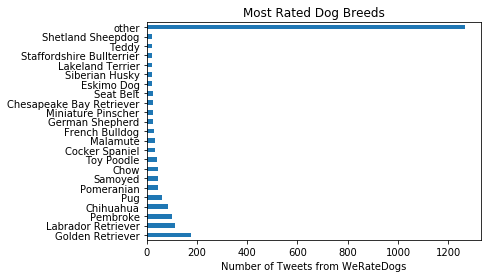

In [397]:
prob = df.prediction_1.value_counts()
threshold = 20
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='barh')

plt.title ('Most Rated Dog Breeds')
plt.xlabel('Number of Tweets from WeRateDogs')

plt.show();

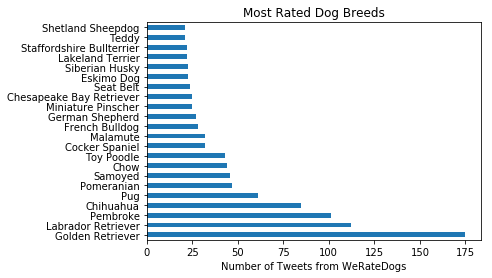

In [398]:
prob = df.prediction_1.value_counts()
threshold = 20
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob.plot(kind='barh')

plt.title ('Most Rated Dog Breeds')
plt.xlabel('Number of Tweets from WeRateDogs')

plt.show();

Golden Retrievers are the most popular dogs on the WeRateDogs Twitter feed, followed by Labrador Retrievers, Pembrokes, Chihuahuas and Pugs.

### Ratings by Dog Stages on WeRateDogs Twitter

E:\Programs\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


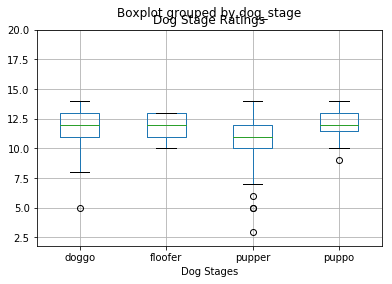

In [401]:
df[df['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])

plt.title ('Dog Stage Ratings')
plt.xlabel('Dog Stages')
plt.ylim(ymax=20)
plt.show();

WeRateDogs appears to rate puppers lower than doggos, floofers and puppos

https://stackoverflow.com/questions/37598665/how-to-plot-a-value-counts-in-pandas-that-has-a-huge-number-of-different-countsprob

https://github.com/Raey2014/WeRateDogs-Udacity-Nanodegree-Project/blob/master/act_report.ipynb

https://github.com/anoru/Wrangling-Data-WeRateDogs/blob/master/act_report.ipynb